# 전구와 스위치
- https://www.acmicpc.net/problem/2138

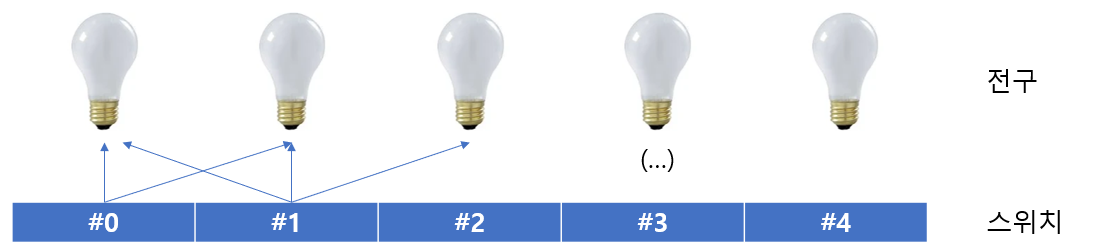
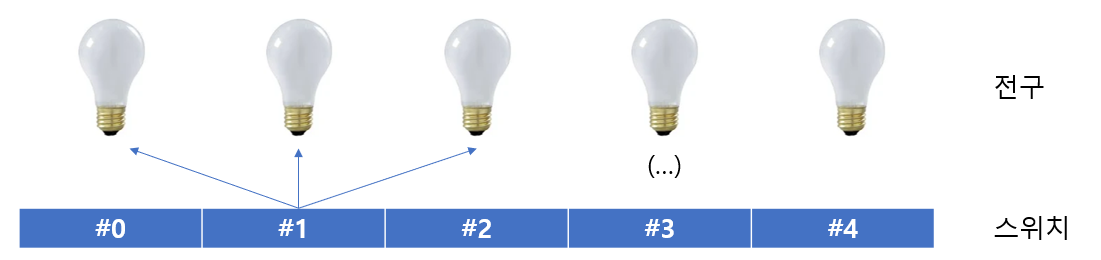
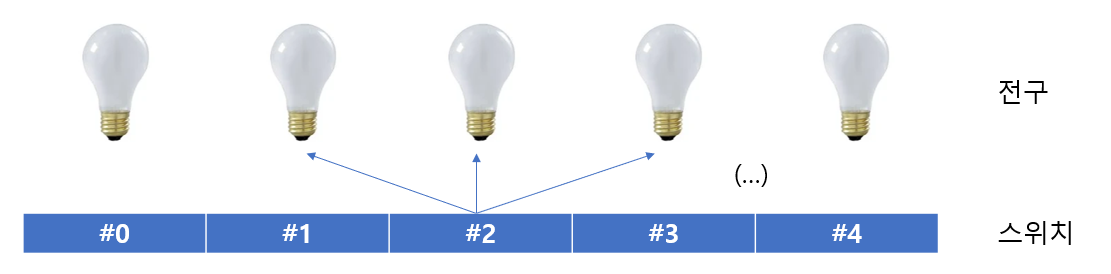

이미지 출처: https://staticvoidlife.tistory.com/143    
클린코드 출처: https://devlibrary00108.tistory.com/465    

- n이 10만이기 때문에 브루트 포스로는 풀 수 없음
- 다음의 두 가지 경우로 나누어 생각해야 한다.
    1. 0번 스위치를 누르지 않았을 때
    2. 0번 스위치를 눌렀을 때
    
위의 이미지를 통해 알 수 있듯이, 0번 전구에 영향을 주는 스위치는 1번 스위치 뿐이다.   
따라서, target과 현재 상태의 **이전 전구**의 상태가 서로 다르면, 스위치를 눌러야 한다.     
지나온 전구는 다시 건드리지 않는다.(이전의 전구를 건드리면 처음의 과정을 반복하게 돼서 메모리 초과나 시간 초과 발생)

- 비트 연산자 ^(XOR)연산을 사용해 현재 상태와 타겟이 서로 다르면 1을 반환하게끔 했다.
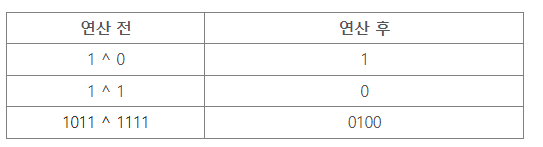

In [36]:
# import sys
# input = sys.stdin.readline

def change(now, cnt): 
    if cnt == 1: 
        now[0] ^= 1
        now[1] ^= 1
    for i in range(1, n-1): # 1부터 n-1까지는 i-1, i, i+1 스위치를 모두 누름
        if now[i-1] != target[i-1]: 
            cnt += 1 
            now[i-1] ^= 1
            now[i] ^= 1 
            now[i+1] ^= 1 
    if now[n-2] != target[n-2]: # 마지막 스위치를 누를지 결정하기 위해 그 앞의 스위치 확인
        cnt += 1 
        now[n-2] ^= 1
        now[n-1] ^= 1
    return cnt if now == target else float('inf')


n = int(input()) 
now = list(map(int, input().rstrip())) 
target = list(map(int,input().rstrip())) 

res1 = change(now[:], 0) # 첫 번째 전구 스위치를 누르지 않은 경우
res2 = change(now[:], 1) # 첫 번째 전구 스위치를 누른 경우

print(min(res1, res2) if res1 != float('inf') or res2 != float('inf') else -1)

3
000
010
3


# 순회강연
- https://www.acmicpc.net/problem/2109

날짜를 기준으로 오름차순 정렬    
매번 가장 강연료를 많이 받을 수 있게끔 최소힙 사용

In [112]:
import heapq

n = int(input())
schedule = []
for _ in range(n):
    schedule.append(list(map(int, input().split())))

schedule.sort(key=lambda x: x[1])

pay = []
for i in schedule:
    heapq.heappush(pay, i[0]) # 최소힙
    if len(pay) > i[1]:  
        heapq.heappop(pay) # 매번 가장 강연료를 많이 받을 수 있게끔
print(sum(pay))

7
20 1
2 1
10 3
100 2
8 2
5 20
50 10
185


# 물병
- https://www.acmicpc.net/problem/1052

1. 같은 양이 들어있는 물병 두 개를 고른다
2. 한 개의 물병에 다른 한 쪽에 있는 물을 모두 붓는다. 이 방법을 필요한 만큼 계속한다.
+ 상점에서 새로운 물병을 살 수 있음(물은 1리터가 들어있음)

클린코드 출처: https://seokii.tistory.com/m/34

N:3 -> [1, 1, 1] -> [2, 1] = 2^1 + 1

N:5 -> [1, 1, 1, 1, 1] -> [4, 1] = 2^2 + 1

N:7 -> [1, 1, 1, 1, 1, 1, 1] -> [4, 2, 1] = 2^2 + 2^1 + 1

N:3 -> 11 -> 2개

N:5 -> 101 -> 2개

N:7 -> 111 -> 3개

In [133]:
n,k = map(int, input().split())

cnt = 0
while bin(n).count('1') > k:
    n += 1
    cnt += 1
print(cnt)

13 2
3
